# Estudo em dados sobre pesquisa da UFRN

Um dos parâmetros para medir a qualidade de uma instituição de ensino, é o quanto ela investe em pesquisa e desenvolvimento, incentivando seus alunos a terem familiaridade com trabalhos científicos ainda na graduação. Desse modo, esse trabalho tem por objetivo fazer uma análise sobre os dados dos bolsistas de iniciação científica, pesquisadores e projetos de pesquisa da UFRN e apresentar, de forma clara, algumas informações sobre eles.

Trabalho desenvolvido com base de dados abertos da UFRN
*http://dados.ufrn.br/

## 1. Médias, medianas, modas e desvio padrão

In [20]:
# Importar o Pandas
import pandas as pd

# Importar os dados de bolsistas-de-iniciacao-cientifica.csv
data = pd.read_csv("bolsistas-de-iniciacao-cientifica.csv", encoding = 'utf-8', sep = None, engine = 'python')

In [21]:
data.head()

,matricula,discente,titulo,codigo_projeto,ano,orientador,categoria,tipo_de_bolsa,linha_pesquisa,base_pesquisa,cota,inicio,fim,unidade,status
0,200504593,ABDON SILVA RIBEIRO DA CUNHA,Motivos de Adesão e Filiação ao Trabalho Volun...,PVE3275-2009,2009,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Análise e Avaliação de Políticas Públicas;;;,NaN,2009-2010,2009-08-01,2009-12-25 00:00:00,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO
1,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2007,2007,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional;;;,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2007-2008,2007-08-01,2008-07-31 00:00:00,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO
2,200504593,ABDON SILVA RIBEIRO DA CUNHA,Geração e disseminação da inovação na carcinic...,PVE2463-2008,2008,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2008-2009,2008-08-25,2008-11-06 13:35:24.877,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO
3,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2006,2006,MARIANA BALDI,Iniciação Científica (IC),PROPESQ,Organizações e comportamento organizacional;;;,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2006-2007,2006-08-01,2007-07-31 00:00:00,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO
4,2011049415,ABEL LUIS DA SILVA NETO,Estudo de Antenas com Reflectarrays e suas Apl...,PVG6992-2013,2013,ADAILDO GOMES D ASSUNCAO,Iniciação Tecnológica (IT),PIBIT,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",GRUPO DE MICROONDAS E ANTENAS,2013-2014,2013-08-14,2014-06-26 00:00:00,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES - DCO,PENDENTE DE RELATORIO


### Tratamento dos dados

In [22]:
#Colunas da matriz de dados
data.columns.values.tolist()

##Colunas dispensáveis para esse projeto: discente, código projeto

['matricula',
 'discente',
 'titulo',
 'codigo_projeto',
 'ano',
 'orientador',
 'categoria',
 'tipo_de_bolsa',
 'linha_pesquisa',
 'base_pesquisa',
 'cota',
 'inicio',
 'fim',
 'unidade',
 'status']

In [23]:
# Removendo-as...
data.drop(data.columns[1], axis=1, inplace=True)
data.drop(data.columns[2], axis=1, inplace=True)

In [24]:
#Número de entradas: 26473
data.info()
#Dados não obrigatórios: título, linha_pesquisa, base_pesquisa, cota, inicio, fim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 13 columns):
matricula         26473 non-null int64
titulo            26464 non-null object
ano               26473 non-null int64
orientador        26473 non-null object
categoria         26473 non-null object
tipo_de_bolsa     26473 non-null object
linha_pesquisa    25610 non-null object
base_pesquisa     22210 non-null object
cota              26473 non-null object
inicio            26468 non-null object
fim               23323 non-null object
unidade           26473 non-null object
status            26473 non-null object
dtypes: int64(2), object(11)
memory usage: 2.6+ MB


In [25]:
#De modo a deixar a análise mais concisa, vamos fazer a análise dos dados dos ultimos 5 anos.

#Ordena dados por ano
data = data.sort_values(data.columns[2], ascending = True)
                 
#Dados dos últimos 5 anos
data_ultimosAnos = data[data['ano'] > 2012]

#Diminuição do número de dados: 11101 entradas
data_ultimosAnos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11101 entries, 1668 to 14065
Data columns (total 13 columns):
matricula         11101 non-null int64
titulo            11101 non-null object
ano               11101 non-null int64
orientador        11101 non-null object
categoria         11101 non-null object
tipo_de_bolsa     11101 non-null object
linha_pesquisa    10693 non-null object
base_pesquisa     9121 non-null object
cota              11101 non-null object
inicio            11101 non-null object
fim               8015 non-null object
unidade           11101 non-null object
status            11101 non-null object
dtypes: int64(2), object(11)
memory usage: 1.2+ MB


In [26]:
data_ultimosAnos.head()

,matricula,titulo,ano,orientador,categoria,tipo_de_bolsa,linha_pesquisa,base_pesquisa,cota,inicio,fim,unidade,status
1668,2013047581,JOVENS TALENTOS - DIREITO,2013,ANA BEATRIZ FERREIRA REBELLO,Iniciação Científica (IC),JOVENS TALENTOS,NaN,NaN,JOVENS TALENTOS 2013-2014,2013-08-01,2014-07-31 00:00:00,PRÓ-REITORIA DE PESQUISA - PROPESQ,FINALIZADO
968,2014018584,Efeito de fatores ambientais no envelhecimento...,2013,JOSE DANIEL DINIZ MELO,Iniciação Científica (IC),PIBIC,Materiais compósitos poliméricos;;;,MATERIAIS COMPÓSITOS E CERÂMICOS,2014-2015,2014-08-09,2015-07-31 00:00:00,DEPARTAMENTO DE ENGENHARIA DE MATERIAIS - DEPT...,FINALIZADO
1639,2011043387,Fungos Micorrízicos Arbusculares em gradiente ...,2013,BRUNO TOMIO GOTO,Iniciação Científica (IC),PROPESQ,Biodiversidade vegetal e funcionamento de ecos...,Ecologia de Populações e Comunidades Vegetais ...,2014,2014-02-13,2015-07-31 00:00:00,DEPARTAMENTO DE BOTÂNICA E ZOOLOGIA - DBEZ/CB,FINALIZADO
1688,2012910227,Transferindo informações sobre arquitetura ecl...,2013,EDJA BEZERRA FARIA TRIGUEIRO,Iniciação Científica (IC),REUNI,Morfologia e história da arquitetura,MORFOLOGIA E USOS DA ARQUITETURA - MUsA,2013,2013-03-04,2013-06-19 00:00:00,DEPARTAMENTO DE ARQUITETURA - ARQ/CT,FINALIZADO
18079,2012961638,A Atenção Primária e o direito à saúde em Nata...,2013,EDLA HOFFMANN,Iniciação Científica (IC),NUPLAM,"Estado, Sociedade, Políticas Sociais e Direitos",Grupo de Estudos e Pesquisas em Questão Social...,2014,2015-04-07,2015-07-31 00:00:00,DEPARTAMENTO DE SERVIÇO SOCIAL - DESSO/CCSA,FINALIZADO


### Análise dos dados: Tipos de bolsa & Unidades mais contempladas com bolsistas
Vamos verificar então a distribuição dos tipos de bolsas entre os alunos nos últimos 5 anos:

In [27]:
tipos_bolsa = data_ultimosAnos['tipo_de_bolsa'].reset_index()

#Novo dataframe com quantidade de cada bolsa
tipos_bolsa['count'] = 0
tipos_bolsa = pd.DataFrame(tipos_bolsa.groupby(['tipo_de_bolsa'])['count'].count()).reset_index()

tipos_bolsa = tipos_bolsa.sort_values(tipos_bolsa.columns[1], ascending = True).reset_index()
tipos_bolsa.drop(tipos_bolsa.columns[0], axis=1, inplace=True)

In [28]:
tipos_bolsa

,tipo_de_bolsa,count
0,BALCÃO,1
1,ECT,2
2,PPG/PROPESQ,2
3,Bolsas de IC/IT -PICME,5
4,FUNTTEL,8
5,PIBITI CNPq,14
6,PIBIC AF CNPq,26
7,PIBIC AF,41
8,PIBIT,45
9,NUPLAM,91


In [29]:
from bokeh.charts import Bar, output_notebook, show

p = Bar(tipos_bolsa, 'tipo_de_bolsa', values='count', title="Distribuição de bolsas da UFRN", legend = None )

p.xaxis.axis_label = 'Bolsas ofertadas'
p.yaxis.axis_label = 'Quantidade'

output_notebook()
show(p)

Loading BokehJS ...

#### Análise preliminar
$\qquad$ Pelo gráfico acima, pode-se perceber que a UF contava com 18 classificações de bolsas, fornecendo mais de 8000 bolsas ao 
longo desses 5 anos. Os tipos de bolsa remunerada que contemplam mais alunos são as do programa de Bolsas de Iniciação Científica da Pró-Reitoria de Pesquisa(PROPESQ-REUNI),Jovens Talentos e do programa Institucional de Bolsas de Iniciação Científica (PIBIC). As duas primeiras são ministradas diretamente pela UFRN, enquanto que as bolsas do PIBIC fazem parte do programa do Conselho Nacional de Desenvolvimento Científico e Tecnológico (CNPQ). <br/>
$\qquad$ Podemos perceber ainda o grande número de voluntários ao longo desses 5 anos, o que pode indicar a grande demanda por bolsas e o grande interesse dos alunos em ingressarem a iniciação científica, o que só reforça a importância que esses programas de bolsas tem para a faculdade. <br/>
$\qquad$ Vejamos agora um comparativo da distribuição das bolsas de pesquisa da UF ao longo dos últimos 17 anos e quais departamentos da instituição foram mais contemplados com bolsistas e voluntários.

### Distribuição de bolsas ao longo dos anos:

In [30]:
bolsas = data.filter(['ano','tipo_de_bolsa'], axis=1).reset_index()
bolsas.drop(bolsas.columns[0], axis=1, inplace=True)

bolsas_por_ano = bolsas['tipo_de_bolsa'].groupby(bolsas['ano']).count()

#Distribuição das bolsas da UF ao longo dos anos, de 2001 até atualmente (2017)
bolsas_por_ano

ano
2001     662
2002     704
2003     735
2004     788
2005     789
2006     883
2007    1736
2008     850
2009    1853
2010    2349
2011    2000
2012    2023
2013    3595
2014    2707
2015    1865
2016    2009
2017     925
Name: tipo_de_bolsa, dtype: int64

In [31]:
from bokeh.plotting import figure

p = figure(plot_width=500, plot_height=400)

anos = list(range(2001,2018))
valores = bolsas_por_ano.tolist()

# add a line renderer
p.line(anos, valores, line_width=2)

output_notebook()
show(p)

Loading BokehJS ...

In [32]:
media_valores = bolsas_por_ano.mean()
media_valores

1557.235294117647

In [33]:
mediana_valores = bolsas_por_ano.median()
mediana_valores

1736.0

In [34]:
moda_valores = bolsas_por_ano.mode()
moda_valores

0      662
1      704
2      735
3      788
4      789
5      850
6      883
7      925
8     1736
9     1853
10    1865
11    2000
12    2009
13    2023
14    2349
15    2707
16    3595
dtype: int64

In [35]:
desvio_padrao = bolsas_por_ano.std()
desvio_padrao

854.1987861010284

$\qquad$ Pelo gráfico de linhas, temos uma boa noção de como se deu a distribuição de bolsas de pesquisa ao longo desses últimos 17 anos na UFRN. De modo geral, percebe-se que houve um gradativo aumento do número de oportunidades para os alunos desde 2001, começando com cerca de **662 contemplados, valor mínimo de bolsas **nessa distribuição, e tendo um ** valor máximo em 2013, com 3595 bolsas**. <br/>
$\qquad$ Uma situação preocupante é que desde o seu máximo em 2013, o número de bolsas vem caindo gradativamente, até chegar ao menor valor de bolsistas e voluntários em 8 anos, com apenas 925 alunos ligados diretamente aos programas de bolsa da universidade até agora em 2017. Considerando que faltam pouco menos de 4 meses para o fim do período letivo, esse número não deve variar muito. <br/>
$\qquad$ Quanto a dados estatísticos gerais, temos uma **média de bolsas por ano de 1557**. Valor não muito distante da **mediana, de 1736 bolsas**. A distribuição ainda tem um **desvio padrão de 854** e **não possui moda**.

## 2. Números mínimos e máximos, de pelo menos duas variáveis, e suas amplitudes

## 3. Pelo menos dois gráficos de Barras

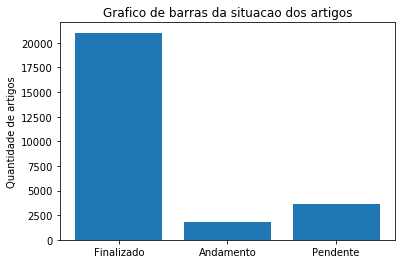

In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt

situacao = []
quantidade = [0, 0, 0]

with open('bolsistas-de-iniciacao-cientifica.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\t')
    for row in readCSV:
         situacao.append(row[14])
    #print situacao
    
    for i in range(0, len(situacao)):
        if situacao[i] == 'FINALIZADO':
            quantidade[0] = (quantidade[0]+1)
        if situacao[i] == 'EM ANDAMENTO':
            quantidade[1] = (quantidade[1]+1)
        if situacao[i] == 'PENDENTE DE RELATORIO':
            quantidade[2] = (quantidade[2]+1)
    aux = ['Finalizado','Andamento', 'Pendente']        
    y_pos = np.arange(len(aux))
    plt.bar(y_pos, quantidade)
    plt.xticks(y_pos, aux)
    plt.title("Grafico de barras da situacao dos artigos")
    plt.ylabel('Quantidade de artigos')
    plt.show()

## 4. Pelo menos dois gráficos de Linhas

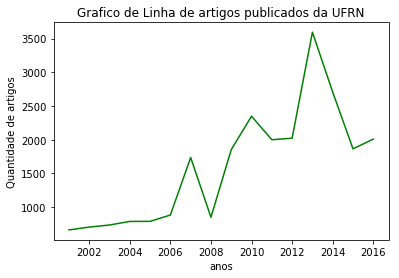

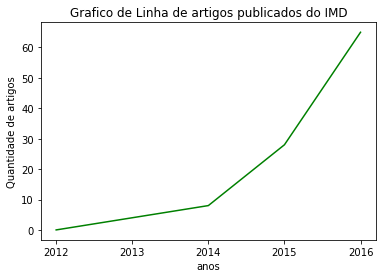

In [14]:
import csv
import numpy as np
from matplotlib import pyplot as plt

anos = []
imd = []
quantidade = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quantidadeIMD = [0, 0, 0, 0, 0]
with open('bolsistas-de-iniciacao-cientifica.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\t')
    for row in readCSV:
         anos.append(row[4])
         if row[13] == 'INSTITUTO METROPOLE DIGITAL - IMD':
            imd.append(row[4])

    for ano in anos:
        if(ano != "ano"):
            index = int(ano) - 2001
            if(index >= 0 and index <= 15):
                quantidade[index] += 1

    for ano in imd:
        if(ano != "ano"):
            index = int(ano)-2012
            if(index >= 0 and index <= 4):
                quantidadeIMD[index] += 1
            
#Tirei 2017 por que o ano ainda n acabou e a bse de dados n tem os artigos de 2017, então n ajudaria na analise do gráfico         
xs = [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,
      2012,2013,2014,2015,2016]
#print len(anos)
#print len(imd)
plt.title("Grafico de Linha de artigos publicados da UFRN") 
plt.ylabel("Quantidade de artigos")
plt.xlabel("anos")
plt.plot(xs,quantidade,'g-')
plt.show()

xz = [2012,2013,2014,2015,2016]
plt.title("Grafico de Linha de artigos publicados do IMD") 
plt.ylabel("Quantidade de artigos")
plt.xlabel("anos")
plt.plot(np.arange(len(xz)),quantidadeIMD,'g-')
plt.xticks(np.arange(len(xz)), xz)


plt.show()

## 5. Pelo menos dois gráficos Bloxplot

In [6]:
import numpy as np
import pandas as pd
from bokeh.charts import BoxPlot, output_notebook, show

df = pd.read_csv("projetos-de-pesquisa.csv", sep="\";\"")
df["ano"] = df["ano"].apply(pd.to_numeric, errors='coerce')

unidades = set()
unidadeInternalProjects = dict()
unidadeExternalProjects = dict()

def countProjectsByUnidade(row):
    if(row["tipo_projeto"] == "INTERNO"):
        unidadeInternalProjects[row["unidade"]] += 1
    elif(row["tipo_projeto"] == "EXTERNO"):
        unidadeExternalProjects[row["unidade"]] += 1

/home/pitagoras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [7]:
def projectsBoxplot(df, year=-2000, specificTypes=True):
    df = df[df.ano >= year]    
    for unidade in df.unidade.unique():
        unidades.add(unidade)
        unidadeInternalProjects[unidade] = 0
        unidadeExternalProjects[unidade] = 0
        
    df.apply(lambda row: countProjectsByUnidade(row), axis=1)
    
    rows = []
    for unidade in unidades:
        if(specificTypes):
            newRow = dict()
            newRow["unidade"] = unidade
            newRow["projType"] = "INTERNO"
            newRow["count"] = unidadeInternalProjects[unidade]
            rows.append(newRow)
            
            newRow = dict()
            newRow["unidade"] = unidade
            newRow["projType"] = "EXTERNO"
            newRow["count"] = unidadeExternalProjects[unidade]
            rows.append(newRow)
        else:
            newRow = dict()
            newRow["unidade"] = unidade
            newRow["projType"] = "TODOS"
            newRow["count"] = unidadeExternalProjects[unidade] + unidadeInternalProjects[unidade] 
            rows.append(newRow)
        
    unidadesDf = pd.DataFrame(rows, columns=["unidade", "projType",
                                             "count"])
    p = BoxPlot(unidadesDf, values='count', label="projType", color="projType",
                whisker_color='goldenrod', title="Projetos em Unidades da UFRN")
    output_notebook()
    show(p)

In [9]:
projectsBoxplot(df, year=2015, specificTypes=False)

Loading BokehJS ...

In [10]:
projectsBoxplot(df, year=2015)

Loading BokehJS ...

## 6. Pelo menos dois gráficos de Correlação

In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

np.random.seed(int(datetime.now().day + datetime.now().second))

sns.set(color_codes=True)

df = pd.read_csv("pesquisadores.csv", sep=";")
df['totalProjetos'] = df.apply(lambda row: row['internos']+row['externos'],
  axis=1)

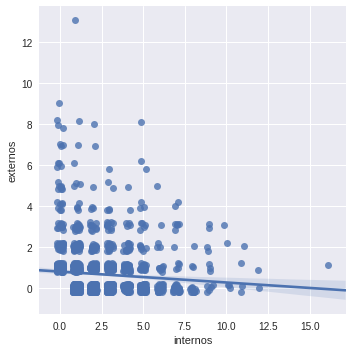

In [17]:
sns.lmplot(x="internos", y="externos", data=df, x_jitter=0.2, y_jitter=0.21, robust=False);

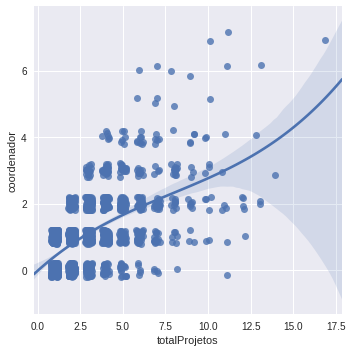

In [18]:
sns.lmplot(x="totalProjetos", y="coordenador", data=df, 
                  x_jitter=0.2, y_jitter=0.21, order=3);